<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


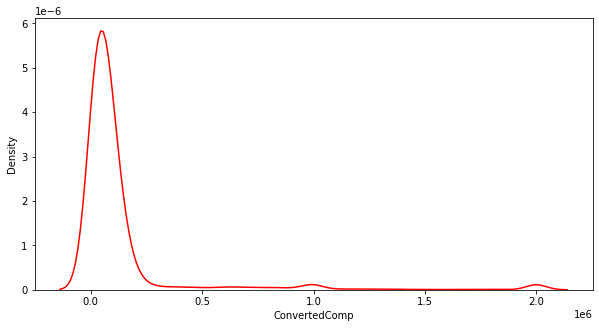

In [68]:
# your code goes here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
ax = sns.distplot(df['ConvertedComp'], hist=False, color='r', label='Converted Comp')
#ax = sns.distplot(df['ConvertedComp'], color='r', label='Converted Comp')
#plt.show()

Plot the histogram for the column `ConvertedComp`.


[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


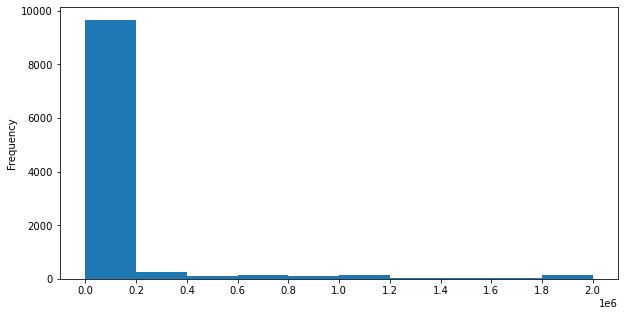

In [67]:
# your code goes here
plt.figure(figsize=(10,5))
#df['ConvertedComp'].hist()

#all 3 produce same plot
#plt.hist(df['ConvertedComp'], bins=10)
#df['ConvertedComp'].plot(kind='hist')
#df.ConvertedComp.plot(kind='hist')

df_temp = df[np.isfinite(df['ConvertedComp'])]
count, bin_edges = np.histogram(df_temp['ConvertedComp'])
print(bin_edges)
#df.ConvertedComp.plot(kind='hist', xticks=bin_edges)
df['ConvertedComp'].plot(kind='hist', xticks=bin_edges)
plt.show()

What is the median of the column `ConvertedComp`?


In [35]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [38]:
# your code goes here
df['Gender'].value_counts()
#10480 identify as men

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
# your code goes here
df_woman = df[df['Gender'] == 'Woman']
df_woman['ConvertedComp'].median()
#df.ConvertedComp[df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [50]:
# your code goes here
min = df['Age'].min()
min1 = df['Age'].quantile(0)
q1 = df['Age'].quantile(.25)
median = df['Age'].median()
median1 = df['Age'].quantile(0.5)
q3 = df['Age'].quantile(.75)
max = df['Age'].max()
max1 = df['Age'].quantile(1)

#min, q1, median, q3, max = df['Age'].quantile([0, .25, .5, .75, 1])

print('min', min)
print('min1', min1)
print('q1', q1)
print('median', median)
print('median1', median1)
print('q3', q3)
print('max', max)
print('max1', max1)


min 16.0
min1 16.0
q1 25.0
median 29.0
median1 29.0
q3 35.0
max 99.0
max1 99.0


Plot a histogram of the column `Age`.


[16.  24.3 32.6 40.9 49.2 57.5 65.8 74.1 82.4 90.7 99. ]


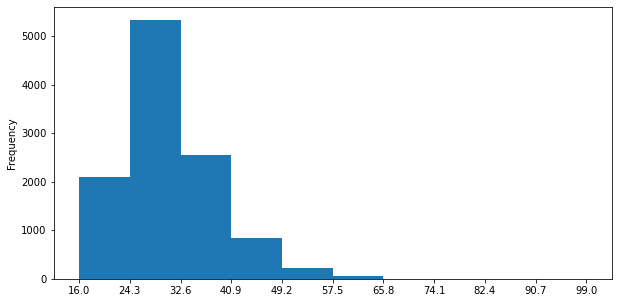

In [77]:
# your code goes here
plt.figure(figsize=(10,5))
#df['Age'].hist()
#df['Age'].plot(kind='hist')

df_temp2 = df[np.isfinite(df['Age'])]
count, bin_edges = np.histogram(df_temp2['Age'])
print(bin_edges)
df['Age'].plot(kind='hist', xticks=bin_edges)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


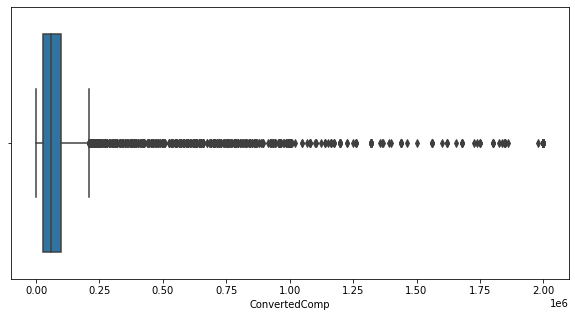

In [109]:
# your code goes here
plt.figure(figsize=(10,5))
#df['ConvertedComp'].plot(kind='box')
#sns.boxplot(x='ConvertedComp', data=df)
sns.boxplot(x=df['ConvertedComp'])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [81]:
# your code goes here
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)
IQR = q3 - q1
print(IQR)

73132.0


Find out the upper and lower bounds.


In [85]:
# your code goes here
up_bound = q3 + 1.5 * IQR
low_bound = q1 - 1.5 * IQR
print('upper:', up_bound)
print('lower:', low_bound)

upper: 209698.0
lower: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [88]:
# your code goes here
outliers = []
counter = 0
for val in df['ConvertedComp']:
    if val > up_bound or val < low_bound:
        outliers.append(val)
        counter += 1
        
num_outliers = len(outliers)
print(num_outliers, counter)

879 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [97]:
# your code goes here
df_no_outliers = df[~df['ConvertedComp'].isin(outliers)]
df_no_outliers2 = df[(df['ConvertedComp'] > low_bound) & (df['ConvertedComp'] < up_bound)]
print(len(df_no_outliers), len(df_no_outliers2), df.shape)
print(np.isnan(df['ConvertedComp']).value_counts())

10519 9703 (11398, 85)
False    10582
True       816
Name: ConvertedComp, dtype: int64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [102]:
# your code goes here
#df[['Age', 'ConvertedComp']].corr()
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [103]:
#after removing outliers and nan values from Age
df_no_outliers2.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


In [107]:
#df.describe()
df_no_outliers2.describe()
#df_no_outliers.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


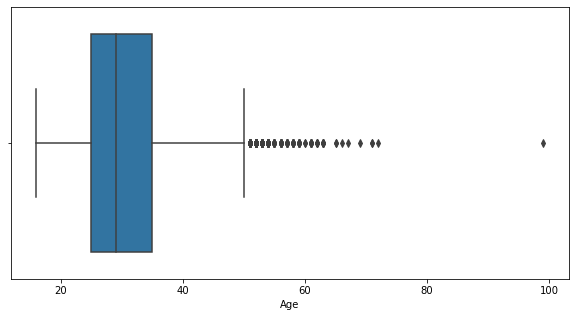

In [110]:
#Age boxplot
plt.figure(figsize=(10,5))
#df['Age'].plot(kind='box')
#sns.boxplot(x='Age', data=df)
sns.boxplot(x=df['Age'])
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
